# Data Collection

While collecting the dataset from kolesa.kz, we encountered numerous server connection errors that prevented the scraping process. Many companies disapprove of third-party users collecting their data without permission and often restrict scraping to protect their information, even from large giants like Google. To overcome these challenges, we used different user agents to randomize the scraping requests.

# Scraping

In [2]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import random

# List of User-Agent strings for randomization
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
]

# Function to scrape a single page
def scrape_page(page_number):
    url = f"https://kolesa.kz/cars/?page={page_number}"
    dataset = []
    try:
        headers = {
            "User-Agent": random.choice(USER_AGENTS)
        }
        response = requests.get(url, headers=headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract car listings
        cars = soup.select(".a-card")
        for car in cars:
            title = car.select_one(".a-card__title").get_text(strip=True) if car.select_one(".a-card__title") else "No title"
            price = car.select_one(".a-card__price").get_text(strip=True) if car.select_one(".a-card__price") else "No price"
            description = car.select_one(".a-card__description").get_text(strip=True) if car.select_one(".a-card__description") else "No description"
            location = car.select_one(".a-card__param").get_text(strip=True) if car.select_one(".a-card__param") else "No viewers"
            dataset.append({
                "Title": title,
                "Price": price,
                "Description": description,
                "Location": location
            })
        
        print(f"Page {page_number} scraped successfully.")
        return dataset
    except requests.exceptions.RequestException as e:
        print(f"Error on page {page_number}: {e}")
        return []

# Main function to scrape pages and append data
def scrape_kolesa_append():
    filename = "kolesa_cars.csv"
    for page in range(1, 101):
        dataset = scrape_page(page)
        
        if dataset:
            df = pd.DataFrame(dataset)
            df.to_csv(filename, mode='a', index=False, header=False)
            print(f"Appended data for page {page}.")
        
        # Randomized delay between requests
        delay = random.randint(10, 20)  # 10 to 20 seconds
        print(f"Sleeping for {delay} seconds before next request...")
        time.sleep(delay)

if __name__ == "__main__":
    scrape_kolesa_append()


Error on page 1: Exceeded 30 redirects.
Sleeping for 10 seconds before next request...
Page 2 scraped successfully.
Appended data for page 2.
Sleeping for 15 seconds before next request...
Page 3 scraped successfully.
Appended data for page 3.
Sleeping for 20 seconds before next request...
Page 4 scraped successfully.
Appended data for page 4.
Sleeping for 13 seconds before next request...
Page 5 scraped successfully.
Appended data for page 5.
Sleeping for 11 seconds before next request...
Page 6 scraped successfully.
Appended data for page 6.
Sleeping for 20 seconds before next request...
Page 7 scraped successfully.
Appended data for page 7.
Sleeping for 14 seconds before next request...
Page 8 scraped successfully.
Appended data for page 8.
Sleeping for 10 seconds before next request...
Page 9 scraped successfully.
Appended data for page 9.
Sleeping for 18 seconds before next request...
Page 10 scraped successfully.
Appended data for page 10.
Sleeping for 18 seconds before next requ

We forgot to add the column names ,so we added it here...

In [1]:
import pandas as pd
df = pd.read_csv('kolesa_cars.csv', header=None) 
column_names = ['Title', 'Price', 'Description', 'Location']  
df.columns = column_names
df.to_csv('kolesa_cars.csv', index=False)
print(df.head()) 


               Title        Price  \
0  Toyota Highlander  19 900 000₸   
1             Kia K5   7 700 000₸   
2     Chevrolet Aveo   3 290 000₸   
3   Chevrolet Cobalt   7 500 000₸   
4     Hyundai Accent   8 000 000₸   

                                         Description  Location  
0  2022 г., Б/у кроссовер, 3.5 л, бензин, КПП авт...   Уральск  
1  2011 г., Б/у седан, 2 л, бензин, КПП автомат, ...    Алматы  
2  2011 г., Б/у седан, 1.4 л, бензин, КПП автомат...  Костанай  
3  2023 г., Б/у седан, 1.5 л, бензин, КПП автомат...    Алматы  
4  2021 г., Б/у седан, 1.6 л, бензин, КПП автомат...     Актау  


In [2]:
df

,Title,Price,Description,Location
0,Toyota Highlander,19 900 000₸,"2022 г., Б/у кроссовер, 3.5 л, бензин, КПП авт...",Уральск
1,Kia K5,7 700 000₸,"2011 г., Б/у седан, 2 л, бензин, КПП автомат, ...",Алматы
2,Chevrolet Aveo,3 290 000₸,"2011 г., Б/у седан, 1.4 л, бензин, КПП автомат...",Костанай
3,Chevrolet Cobalt,7 500 000₸,"2023 г., Б/у седан, 1.5 л, бензин, КПП автомат...",Алматы
4,Hyundai Accent,8 000 000₸,"2021 г., Б/у седан, 1.6 л, бензин, КПП автомат...",Актау
...,...,...,...,...
1975,Kia Rio,5 700 000₸,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат...",Шымкент
1976,Toyota Estima,4 200 000₸,"2011 г., Б/у минивэн, 2.4 л, газ-бензин, Правы...",Кызылорда
1977,Opel Astra,2 000 000₸,"2001 г., Б/у универсал, 1.6 л, бензин, КПП мех...",Актобе
1978,BMW 523,2 750 000₸,"1996 г., Б/у седан, 2.5 л, бензин, КПП механик...",Жезказган


The description is not completely visible to adjust it,so we used enumare() function to make it fully visible

In [5]:
for index, description in enumerate(df["Description"]):
    print(f"{index}: {description}")


0: 2022 г., Б/у кроссовер, 3.5 л, бензин, КПП автомат, с пробегом 11 000 км, кожа, климат-контроль, Авто в хорошем состоя...
1: 2011 г., Б/у седан, 2 л, бензин, КПП автомат, с пробегом 94 000 км, белый, кожа, климат-контроль, свежепригнан, свежед...
2: 2011 г., Б/у седан, 1.4 л, бензин, КПП автомат, с пробегом 165 000 км, белый, литые диски, тонировка, спойлер, дневные...
3: 2023 г., Б/у седан, 1.5 л, бензин, КПП автомат, с пробегом 3 250 км, серый, линзованная оптика, дневные ходовые огни,...
4: 2021 г., Б/у седан, 1.6 л, бензин, КПП автомат, с пробегом 75 803 км, белый, литые диски, тонировка, ветровики, линзов...
5: 2022 г., Б/у седан, 2.5 л, бензин, КПП автомат, с пробегом 43 000 км, серебристый, металлик, кожа, климат-контроль, вл...
6: На заказ,2024 г., новый лифтбек, 1.5 л, бензин, КПП механика
7: 2019 г., Б/у кроссовер, 2 л, бензин, КПП автомат, с пробегом 76 186 км, серый, литые диски, тонировка, ветровики, днев...
8: 2020 г., Б/у кроссовер, 2.5 л, бензин, КПП автомат, с пробе

We divided the sentences by coma and other details in the description

In [4]:
import pandas as pd

# Process the 'Description' column
def process_description(description):
    # Remove "на заказ" if it exists
    description = description.replace("На заказ,", "").strip()
    
    # Split the description by commas
    parts = [part.strip() for part in description.split(",")]
    
    # Extract the required fields
    поколение = parts[0]  # First part: Year
    кузов = parts[1] if len(parts) > 1 else None  # Second part: Vehicle type
    объем_двигателя = parts[2] if len(parts) > 2 else None  # Third part: Engine capacity
    двигатель = parts[3] if len(parts) > 3 else None  # Fourth part: Engine type
    
    # Extract gearbox and remove "КПП" prefix
    коробка_передач = parts[4].replace("КПП", "").strip() if len(parts) > 4 else None
    
    # Extract mileage
    пробег = None
    for part in parts:
        if "с пробегом" in part:
            пробег = part.replace("с пробегом", "").strip()
            break
    
    
    # Extract color (assume it appears next)
    цвет = None
    for part in parts:
        if part in ["белый", "черный", "серебристый", "зеленый", "бордовый", "серый"]:
            цвет = part
            break
    
    
    # Combine remaining parts as options and characteristics
    options_start = parts.index(цвет) + 1 if цвет in parts else 5
    опции_и_характеристики = ", ".join(parts[options_start:])
    
    return pd.Series([поколение, кузов, объем_двигателя, двигатель, коробка_передач, пробег, цвет, опции_и_характеристики])

# Apply the function to the DataFrame
df_processed = df['Description'].apply(process_description)
df_processed.columns = ['Поколение', 'Кузов', 'Объем двигателя', 'Двигатель', 'Коробка передач', 'Пробег', 'Цвет', 'Опции и характеристики']

# Combine the processed columns back into the original DataFrame
df = pd.concat([df, df_processed], axis=1)

# Display the processed DataFrame
print(df.head())


               Title        Price  \
0  Toyota Highlander  19 900 000₸   
1             Kia K5   7 700 000₸   
2     Chevrolet Aveo   3 290 000₸   
3   Chevrolet Cobalt   7 500 000₸   
4     Hyundai Accent   8 000 000₸   

                                         Description  Location Поколение  \
0  2022 г., Б/у кроссовер, 3.5 л, бензин, КПП авт...   Уральск   2022 г.   
1  2011 г., Б/у седан, 2 л, бензин, КПП автомат, ...    Алматы   2011 г.   
2  2011 г., Б/у седан, 1.4 л, бензин, КПП автомат...  Костанай   2011 г.   
3  2023 г., Б/у седан, 1.5 л, бензин, КПП автомат...    Алматы   2023 г.   
4  2021 г., Б/у седан, 1.6 л, бензин, КПП автомат...     Актау   2021 г.   

           Кузов Объем двигателя Двигатель Коробка передач      Пробег   Цвет  \
0  Б/у кроссовер           3.5 л    бензин         автомат   11 000 км   None   
1      Б/у седан             2 л    бензин         автомат   94 000 км  белый   
2      Б/у седан           1.4 л    бензин         автомат  165 000 км  белый

In [5]:
df

,Title,Price,Description,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19 900 000₸,"2022 г., Б/у кроссовер, 3.5 л, бензин, КПП авт...",Уральск,2022 г.,Б/у кроссовер,3.5 л,бензин,автомат,11 000 км,None,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7 700 000₸,"2011 г., Б/у седан, 2 л, бензин, КПП автомат, ...",Алматы,2011 г.,Б/у седан,2 л,бензин,автомат,94 000 км,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3 290 000₸,"2011 г., Б/у седан, 1.4 л, бензин, КПП автомат...",Костанай,2011 г.,Б/у седан,1.4 л,бензин,автомат,165 000 км,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7 500 000₸,"2023 г., Б/у седан, 1.5 л, бензин, КПП автомат...",Алматы,2023 г.,Б/у седан,1.5 л,бензин,автомат,3 250 км,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8 000 000₸,"2021 г., Б/у седан, 1.6 л, бензин, КПП автомат...",Актау,2021 г.,Б/у седан,1.6 л,бензин,автомат,75 803 км,белый,"литые диски, тонировка, ветровики, линзов..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Kia Rio,5 700 000₸,"2014 г., Б/у седан, 1.6 л, бензин, КПП автомат...",Шымкент,2014 г.,Б/у седан,1.6 л,бензин,автомат,None,белый,"комбинированный, кондиционер, Майы ауыскан арт..."
1976,Toyota Estima,4 200 000₸,"2011 г., Б/у минивэн, 2.4 л, газ-бензин, Правы...",Кызылорда,2011 г.,Б/у минивэн,2.4 л,газ-бензин,Правый руль,290 000 км,белый,"литые диски, лебёдка..."
1977,Opel Astra,2 000 000₸,"2001 г., Б/у универсал, 1.6 л, бензин, КПП мех...",Актобе,2001 г.,Б/у универсал,1.6 л,бензин,механика,477 818 км,None,"с пробегом 477 818 км, голубой, литые диски, т..."
1978,BMW 523,2 750 000₸,"1996 г., Б/у седан, 2.5 л, бензин, КПП механик...",Жезказган,1996 г.,Б/у седан,2.5 л,бензин,механика,5 900 км,None,"с пробегом 5 900 км, фиолетовый, металлик, Тол..."


In [6]:
import numpy as np
valid_options = [
    "литые диски", "тонировка", "панорамная крыша", "ксенон", "биксенон",
    "хрустальная оптика", "линзованная оптика", "дневные ходовые огни",
    "противотуманки", "омыватель фар", "корректор фар", "обогрев зеркал",
    "кожа", "дерево", "комбинированный", "ГУР", "ABS", "SRS", "зимний режим",
    "спортивный режим", "турбонаддув", "турботаймер", "сигнализация",
    "автозапуск", "иммобилайзер", "бесключевой доступ", "полный электропакет",
    "центрозамок", "кондиционер", "круиз-контроль", "бортовой компьютер",
    "навигационная система", "мультируль", "подогрев руля", "подогрев сидений",
    "вентиляция сидений", "память сидений", "память руля", "парктроники",
    "камера заднего вида", "датчик дождя", "датчик давления в шинах",
    "пневмоподвеска", "изменяемый клиренс", "налог уплачен", "техосмотр пройден",
    "вложений не требует"
]

# Replace 'Опции и характеристики' with NaN if none of the valid options are present
def replace_with_nan_if_no_valid_options(row):
    options = row.get('Опции и характеристики', '')
    if not any(option in options for option in valid_options):
        return np.nan
    return options

# Apply the function to the dataframe
df['Опции и характеристики'] = df.apply(replace_with_nan_if_no_valid_options, axis=1)

df.head()


,Title,Price,Description,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19 900 000₸,"2022 г., Б/у кроссовер, 3.5 л, бензин, КПП авт...",Уральск,2022 г.,Б/у кроссовер,3.5 л,бензин,автомат,11 000 км,None,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7 700 000₸,"2011 г., Б/у седан, 2 л, бензин, КПП автомат, ...",Алматы,2011 г.,Б/у седан,2 л,бензин,автомат,94 000 км,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3 290 000₸,"2011 г., Б/у седан, 1.4 л, бензин, КПП автомат...",Костанай,2011 г.,Б/у седан,1.4 л,бензин,автомат,165 000 км,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7 500 000₸,"2023 г., Б/у седан, 1.5 л, бензин, КПП автомат...",Алматы,2023 г.,Б/у седан,1.5 л,бензин,автомат,3 250 км,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8 000 000₸,"2021 г., Б/у седан, 1.6 л, бензин, КПП автомат...",Актау,2021 г.,Б/у седан,1.6 л,бензин,автомат,75 803 км,белый,"литые диски, тонировка, ветровики, линзов..."


Converting the dataset to a csv file:

In [20]:
df.to_csv('kolesa.kz_cars.csv')

In [18]:
df.drop('Description',axis=1,inplace=True)

Here's a final result:

In [19]:
df

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19 900 000₸,Уральск,2022 г.,Б/у кроссовер,3.5 л,бензин,автомат,11 000 км,NaN,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7 700 000₸,Алматы,2011 г.,Б/у седан,2 л,бензин,автомат,94 000 км,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3 290 000₸,Костанай,2011 г.,Б/у седан,1.4 л,бензин,автомат,165 000 км,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7 500 000₸,Алматы,2023 г.,Б/у седан,1.5 л,бензин,автомат,3 250 км,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8 000 000₸,Актау,2021 г.,Б/у седан,1.6 л,бензин,автомат,75 803 км,белый,"литые диски, тонировка, ветровики, линзов..."
...,...,...,...,...,...,...,...,...,...,...,...
1975,Kia Rio,5 700 000₸,Шымкент,2014 г.,Б/у седан,1.6 л,бензин,автомат,NaN,белый,"комбинированный, кондиционер, Майы ауыскан арт..."
1976,Toyota Estima,4 200 000₸,Кызылорда,2011 г.,Б/у минивэн,2.4 л,газ-бензин,Правый руль,290 000 км,белый,"литые диски, лебёдка..."
1977,Opel Astra,2 000 000₸,Актобе,2001 г.,Б/у универсал,1.6 л,бензин,механика,477 818 км,NaN,"с пробегом 477 818 км, голубой, литые диски, т..."
1978,BMW 523,2 750 000₸,Жезказган,1996 г.,Б/у седан,2.5 л,бензин,механика,5 900 км,NaN,NaN


In [1]:
import pandas as pd
df=pd.read_csv('kolesa.kz_cars.csv')
df

,Unnamed: 0,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,0,Toyota Highlander,19 900 000₸,Уральск,2022 г.,Б/у кроссовер,3.5 л,бензин,автомат,11 000 км,NaN,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,1,Kia K5,7 700 000₸,Алматы,2011 г.,Б/у седан,2 л,бензин,автомат,94 000 км,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,2,Chevrolet Aveo,3 290 000₸,Костанай,2011 г.,Б/у седан,1.4 л,бензин,автомат,165 000 км,белый,"литые диски, тонировка, спойлер, дневные..."
3,3,Chevrolet Cobalt,7 500 000₸,Алматы,2023 г.,Б/у седан,1.5 л,бензин,автомат,3 250 км,серый,"линзованная оптика, дневные ходовые огни, ..."
4,4,Hyundai Accent,8 000 000₸,Актау,2021 г.,Б/у седан,1.6 л,бензин,автомат,75 803 км,белый,"литые диски, тонировка, ветровики, линзов..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1975,Kia Rio,5 700 000₸,Шымкент,2014 г.,Б/у седан,1.6 л,бензин,автомат,NaN,белый,"комбинированный, кондиционер, Майы ауыскан арт..."
1976,1976,Toyota Estima,4 200 000₸,Кызылорда,2011 г.,Б/у минивэн,2.4 л,газ-бензин,Правый руль,290 000 км,белый,"литые диски, лебёдка..."
1977,1977,Opel Astra,2 000 000₸,Актобе,2001 г.,Б/у универсал,1.6 л,бензин,механика,477 818 км,NaN,"с пробегом 477 818 км, голубой, литые диски, т..."
1978,1978,BMW 523,2 750 000₸,Жезказган,1996 г.,Б/у седан,2.5 л,бензин,механика,5 900 км,NaN,NaN


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19 900 000₸,Уральск,2022 г.,Б/у кроссовер,3.5 л,бензин,автомат,11 000 км,NaN,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7 700 000₸,Алматы,2011 г.,Б/у седан,2 л,бензин,автомат,94 000 км,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3 290 000₸,Костанай,2011 г.,Б/у седан,1.4 л,бензин,автомат,165 000 км,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7 500 000₸,Алматы,2023 г.,Б/у седан,1.5 л,бензин,автомат,3 250 км,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8 000 000₸,Актау,2021 г.,Б/у седан,1.6 л,бензин,автомат,75 803 км,белый,"литые диски, тонировка, ветровики, линзов..."
...,...,...,...,...,...,...,...,...,...,...,...
1975,Kia Rio,5 700 000₸,Шымкент,2014 г.,Б/у седан,1.6 л,бензин,автомат,NaN,белый,"комбинированный, кондиционер, Майы ауыскан арт..."
1976,Toyota Estima,4 200 000₸,Кызылорда,2011 г.,Б/у минивэн,2.4 л,газ-бензин,Правый руль,290 000 км,белый,"литые диски, лебёдка..."
1977,Opel Astra,2 000 000₸,Актобе,2001 г.,Б/у универсал,1.6 л,бензин,механика,477 818 км,NaN,"с пробегом 477 818 км, голубой, литые диски, т..."
1978,BMW 523,2 750 000₸,Жезказган,1996 г.,Б/у седан,2.5 л,бензин,механика,5 900 км,NaN,NaN


# Data Analysis and Insights

# Data Cleaning and Preparation

Checking and converting data types for further analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1980 non-null   object
 1   Price                   1980 non-null   object
 2   Location                1980 non-null   object
 3   Поколение               1980 non-null   object
 4   Кузов                   1980 non-null   object
 5   Объем двигателя         1980 non-null   object
 6   Двигатель               1980 non-null   object
 7   Коробка передач         1975 non-null   object
 8   Пробег                  1440 non-null   object
 9   Цвет                    1393 non-null   object
 10  Опции и характеристики  1358 non-null   object
dtypes: object(11)
memory usage: 170.3+ KB


In [7]:

# Converting 'Price', 'Пробег','Поколение' and 'Объем двигателя' to numeric types, handle empty values
df["Price"] = pd.to_numeric(df["Price"].str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["Пробег"] = pd.to_numeric(df["Пробег"].str.replace(r"[^\d]", "", regex=True), errors='coerce')
df["Объем двигателя"] = pd.to_numeric(df["Объем двигателя"].str.replace(r"[^\d.]", "", regex=True), errors='coerce')
df["Поколение"] = pd.to_numeric(df["Поколение"].str.extract(r"(\d{4})")[0], errors='coerce')
df.head()  

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,NaN,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7700000,Алматы,2011,Б/у седан,2.0,бензин,автомат,94000.0,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3290000,Костанай,2011,Б/у седан,1.4,бензин,автомат,165000.0,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7500000,Алматы,2023,Б/у седан,1.5,бензин,автомат,3250.0,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8000000,Актау,2021,Б/у седан,1.6,бензин,автомат,75803.0,белый,"литые диски, тонировка, ветровики, линзов..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   1980 non-null   object 
 1   Price                   1980 non-null   int64  
 2   Location                1980 non-null   object 
 3   Поколение               1980 non-null   int64  
 4   Кузов                   1980 non-null   object 
 5   Объем двигателя         1946 non-null   float64
 6   Двигатель               1980 non-null   object 
 7   Коробка передач         1975 non-null   object 
 8   Пробег                  1439 non-null   float64
 9   Цвет                    1393 non-null   object 
 10  Опции и характеристики  1358 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 170.3+ KB


Handling missing values

In [11]:
df.isnull().sum()

Title                       0
Price                       0
Location                    0
Поколение                   0
Кузов                       0
Объем двигателя            34
Двигатель                   0
Коробка передач             5
Пробег                    541
Цвет                      587
Опции и характеристики    622
dtype: int64

In [13]:
df["Коробка передач"] = df["Коробка передач"].fillna("Unknown")
df["Пробег"] = df["Пробег"].fillna(df["Пробег"].median())
df["Объем двигателя"] = df["Объем двигателя"].fillna(df["Объем двигателя"].median())
df["Цвет"] = df["Цвет"].fillna("Unknown")
df["Опции и характеристики"] = df["Опции и характеристики"].fillna("No Data")


In [15]:
df.isnull().sum()

Title                     0
Price                     0
Location                  0
Поколение                 0
Кузов                     0
Объем двигателя           0
Двигатель                 0
Коробка передач           0
Пробег                    0
Цвет                      0
Опции и характеристики    0
dtype: int64

In [17]:
df

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А..."
1,Kia K5,7700000,Алматы,2011,Б/у седан,2.0,бензин,автомат,94000.0,белый,"кожа, климат-контроль, свежепригнан, свежед..."
2,Chevrolet Aveo,3290000,Костанай,2011,Б/у седан,1.4,бензин,автомат,165000.0,белый,"литые диски, тонировка, спойлер, дневные..."
3,Chevrolet Cobalt,7500000,Алматы,2023,Б/у седан,1.5,бензин,автомат,3250.0,серый,"линзованная оптика, дневные ходовые огни, ..."
4,Hyundai Accent,8000000,Актау,2021,Б/у седан,1.6,бензин,автомат,75803.0,белый,"литые диски, тонировка, ветровики, линзов..."
...,...,...,...,...,...,...,...,...,...,...,...
1975,Kia Rio,5700000,Шымкент,2014,Б/у седан,1.6,бензин,автомат,140000.0,белый,"комбинированный, кондиционер, Майы ауыскан арт..."
1976,Toyota Estima,4200000,Кызылорда,2011,Б/у минивэн,2.4,газ-бензин,Правый руль,290000.0,белый,"литые диски, лебёдка..."
1977,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т..."
1978,BMW 523,2750000,Жезказган,1996,Б/у седан,2.5,бензин,механика,5900.0,Unknown,No Data


# EDA

Generating descriptive statistics using Pandas and NumPy

In [19]:
import numpy as np
# Generating descriptive statistics for numeric columns
descriptive_stats = df[["Price", "Пробег", "Объем двигателя"]].describe()
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
              Price         Пробег  Объем двигателя
count  1.980000e+03    1980.000000      1980.000000
mean   1.129500e+07  151147.644949         2.388535
std    1.391776e+07  102876.786851         0.972692
min    3.500000e+05       1.000000         0.800000
25%    4.175000e+06   89952.000000         1.600000
50%    7.850000e+06  140000.000000         2.000000
75%    1.300000e+07  190106.000000         2.800000
max    2.180000e+08  777777.000000         6.300000


Providing a comprehensive overview of the dataset, including central tendencies,
variance, and distributions.

In [21]:
# Selecting the relevant columns for descriptive statistics
columns = ["Price", "Пробег", "Объем двигателя"]
# Calculating additional statistics
statistics = {
    "Mean": df[columns].mean(),
    "Median": df[columns].median(),
    "Mode": df[columns].mode().iloc[0],  # Getting the first mode for each column
    "Variance": df[columns].var(),
    "Skewness": df[columns].skew(),
    "Kurtosis": df[columns].kurt()
}

print("\nComprehensive overview of the dataset, including central tendencies, variance, and distributions:")
for key, value in statistics.items():
    print(f"{key}:")
    print(value)



Comprehensive overview of the dataset, including central tendencies, variance, and distributions:
Mean:
Price              1.129500e+07
Пробег             1.511476e+05
Объем двигателя    2.388535e+00
dtype: float64
Median:
Price              7850000.0
Пробег              140000.0
Объем двигателя          2.0
dtype: float64
Mode:
Price              7000000.0
Пробег              140000.0
Объем двигателя          2.0
Name: 0, dtype: float64
Variance:
Price              1.937040e+14
Пробег             1.058363e+10
Объем двигателя    9.461292e-01
dtype: float64
Skewness:
Price              5.069653
Пробег             1.304499
Объем двигателя    1.518478
dtype: float64
Kurtosis:
Price              44.182872
Пробег              3.279323
Объем двигателя     2.384339
dtype: float64


Identifying outliers and unusual patterns

In [23]:
import pandas as pd

# Selecting relevant columns for outlier detection
columns = ["Price", "Пробег", "Объем двигателя"]

# Create an empty dictionary to store outliers
outliers = {}

# Loop through each column to detect outliers using Z-score
for col in columns:
    mean = df[col].mean()
    std = df[col].std()
    z_scores = (df[col] - mean) / std
    
    # Outliers based on Z-score
    outliers[col] = df[(z_scores < -3) | (z_scores > 3)]

# Discuss outliers and unusual patterns
outlier_info = {}
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        outlier_info[col] = {
            'count': len(outlier_df),
            'examples': outlier_df.head().to_dict()  # Show first few examples of outliers
        }

outlier_info


{'Price': {'count': 48,
  'examples': {'Title': {49: 'Jeep Grand Cherokee',
    134: 'Audi Q8 55 TFSI Quattro',
    151: 'BMW X7',
    173: 'Land Rover Defender',
    225: 'BMW X5'},
   'Price': {49: 55000000,
    134: 60500000,
    151: 62000000,
    173: 68674000,
    225: 66859000},
   'Location': {49: 'Алматы',
    134: 'Астана',
    151: 'Астана',
    173: 'Алматы',
    225: 'Усть-Каменогорск'},
   'Поколение': {49: 2021, 134: 2024, 151: 2023, 173: 2024, 225: 2024},
   'Кузов': {49: 'Б/у внедорожник',
    134: 'новый кроссовер',
    151: 'Б/у кроссовер',
    173: 'новый внедорожник',
    225: 'новый кроссовер'},
   'Объем двигателя': {49: 6.2, 134: 3.0, 151: 3.0, 173: 3.0, 225: 3.0},
   'Двигатель': {49: 'бензин',
    134: 'бензин',
    151: 'бензин',
    173: 'бензин',
    225: 'бензин'},
   'Коробка передач': {49: 'автомат',
    134: 'автомат',
    151: 'автомат',
    173: 'автомат',
    225: 'автомат'},
   'Пробег': {49: 33000.0,
    134: 140000.0,
    151: 18000.0,
    173: 14

# Advanced Pandas and Data Wrangling

Using merging, concatenation, and joining operations to enrich or organize the
dataset.


In [25]:
#We are concatenating Uralsk and Almaty datasets
uralsk = df[df['Location'] == 'Уральск']
almaty = df[df['Location'] == 'Алматы']
concatenation = pd.concat([uralsk, almaty])
concatenation

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики
0,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А..."
58,Jetour T2,16990000,Уральск,2024,новый внедорожник,2.0,бензин,робот,140000.0,серебристый,No Data
71,ВАЗ (Lada) 2110,1780000,Уральск,2001,Б/у седан,1.6,бензин,механика,140000.0,Unknown,No Data
229,Chevrolet Tracker LT 1.2,9590000,Уральск,2024,новый кроссовер,1.0,бензин,автомат,140000.0,Unknown,No Data
250,ГАЗ ГАЗель NEXT A32R23,16064000,Уральск,2024,новый фургон,2.7,бензин,механика,140000.0,Unknown,No Data
...,...,...,...,...,...,...,...,...,...,...,...
1955,Hyundai Sonata,18100000,Алматы,2024,Б/у седан,2.5,бензин,автомат,24000.0,черный,No Data
1957,Chevrolet Camaro,6800000,Алматы,2014,Б/у купе,3.6,бензин,автомат,140000.0,Unknown,"синий, биксенон, аудиосистема, bluetooth, CD, ..."
1961,Hyundai Sonata,18100000,Алматы,2024,Б/у седан,2.5,бензин,автомат,24000.0,черный,No Data
1963,Chevrolet Camaro,6800000,Алматы,2014,Б/у купе,3.6,бензин,автомат,140000.0,Unknown,"синий, биксенон, аудиосистема, bluetooth, CD, ..."


Since there were no other data in kolesa.kz ,we decided to create and add additional columns by dividing price into 12,24,36,48 and 60.Since we didn't know the percent of interest rate for each bank,we just divided them by their number giving almost correct results.

In [27]:
# Create a new DataFrame for the 12 Months Payment column
df_payments = df[['Price']].copy()
df_payments['12 Months Payment'] = df['Price'] / 12
df_payments['24 Months Payment'] = df['Price'] / 24
df_payments['36 Months Payment'] = df['Price'] / 36
df_payments['48 Months Payment'] = df['Price'] / 48
df_payments['60 Months Payment'] = df['Price'] / 60
df_payments

,Price,12 Months Payment,24 Months Payment,36 Months Payment,48 Months Payment,60 Months Payment
0,19900000,1.658333e+06,829166.666667,552777.777778,414583.333333,331666.666667
1,7700000,6.416667e+05,320833.333333,213888.888889,160416.666667,128333.333333
2,3290000,2.741667e+05,137083.333333,91388.888889,68541.666667,54833.333333
3,7500000,6.250000e+05,312500.000000,208333.333333,156250.000000,125000.000000
4,8000000,6.666667e+05,333333.333333,222222.222222,166666.666667,133333.333333
...,...,...,...,...,...,...
1975,5700000,4.750000e+05,237500.000000,158333.333333,118750.000000,95000.000000
1976,4200000,3.500000e+05,175000.000000,116666.666667,87500.000000,70000.000000
1977,2000000,1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333
1978,2750000,2.291667e+05,114583.333333,76388.888889,57291.666667,45833.333333


In [29]:
#Merging our dataframe with '12 months payment' column on 'price' by inner join
merged_pay= pd.merge(df,df_payments, on = 'Price' , how = 'inner')
merged_pay

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики,12 Months Payment,24 Months Payment,36 Months Payment,48 Months Payment,60 Months Payment
0,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А...",1.658333e+06,829166.666667,552777.777778,414583.333333,331666.666667
1,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А...",1.658333e+06,829166.666667,552777.777778,414583.333333,331666.666667
2,Kia K5,7700000,Алматы,2011,Б/у седан,2.0,бензин,автомат,94000.0,белый,"кожа, климат-контроль, свежепригнан, свежед...",6.416667e+05,320833.333333,213888.888889,160416.666667,128333.333333
3,Chevrolet Aveo,3290000,Костанай,2011,Б/у седан,1.4,бензин,автомат,165000.0,белый,"литые диски, тонировка, спойлер, дневные...",2.741667e+05,137083.333333,91388.888889,68541.666667,54833.333333
4,Chevrolet Cobalt,7500000,Алматы,2023,Б/у седан,1.5,бензин,автомат,3250.0,серый,"линзованная оптика, дневные ходовые огни, ...",6.250000e+05,312500.000000,208333.333333,156250.000000,125000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333
17698,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333
17699,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333
17700,BMW 523,2750000,Жезказган,1996,Б/у седан,2.5,бензин,механика,5900.0,Unknown,No Data,2.291667e+05,114583.333333,76388.888889,57291.666667,45833.333333


In [31]:
df['Кузов'].value_counts()

Кузов
Б/у седан            789
Б/у кроссовер        385
Б/у внедорожник      203
новый кроссовер      108
Б/у хэтчбек          104
Б/у минивэн           88
Б/у универсал         74
новый седан           58
Б/у пикап             50
Б/у лифтбек           31
новый внедорожник     29
Б/у фургон            20
Б/у купе               9
новый пикап            8
новый фургон           6
новый лифтбек          5
Б/у микровэн           4
Б/у микроавтобус       3
новый универсал        2
Б/у родстер            2
новый родстер          1
Б/у кабриолет          1
Name: count, dtype: int64

In [33]:
data = {
    'Кузов': [
        'Б/у седан', 'Б/у кроссовер', 'Б/у внедорожник', 'новый кроссовер', 
        'Б/у хэтчбек', 'Б/у минивэн', 'Б/у универсал', 'новый седан', 
        'Б/у пикап', 'Б/у лифтбек', 'новый внедорожник', 'Б/у фургон', 
        'Б/у купе', 'новый пикап', 'новый фургон', 'новый лифтбек', 
        'Б/у микровэн', 'Б/у микроавтобус', 'новый универсал', 
        'Б/у родстер', 'новый родстер', 'Б/у кабриолет'
    ],
    'Oписание кузова': [
        'Классический и комфортный автомобиль для города, идеален для семейных поездок.',
        'Универсальное авто для города и легкого бездорожья, сочетает в себе компактность и мощность.',
        'Мощный автомобиль с отличной проходимостью, подходит для сложных дорожных условий.',
        'Новый автомобиль с улучшенной проходимостью и современными технологиями.',
        'Компактный автомобиль с удобным багажником, удобен для городской жизни.',
        'Автомобиль для большой семьи, с просторным салоном и хорошей вместимостью.',
        'Практичный автомобиль для тех, кто ценит пространство и комфорт при путешествиях.',
        'Новый автомобиль с классическими характеристиками для комфортных поездок по городу.',
        'Автомобиль с открытым грузовым отсеком, идеально подходит для работы и перевозки грузов.',
        'Сочетание седана и хэтчбека, с большим багажным отсеком и стильным дизайном.',
        'Новый автомобиль с улучшенной проходимостью и технологиями для активного отдыха.',
        'Идеален для перевозки грузов и коммерческих целей, отличная вместимость.',
        'Спортивный и стильный автомобиль для любителей быстрой езды и стильного внешнего вида.',
        'Новый автомобиль с улучшенными характеристиками для работы и активного отдыха.',
        'Новый автомобиль для коммерческих нужд, с повышенной грузоподъемностью.',
        'Новый стильный автомобиль с удобным доступом в багажник и хорошими характеристиками.',
        'Небольшой автобус, идеально подходящий для перевозки пассажиров в городских условиях.',
        'Идеален для транспортировки группы людей, например, на экскурсии или поездки.',
        'Новый автомобиль для людей, которые ценят универсальность и комфорт.',
        'Стильный двухместный спортивный автомобиль, идеально подходит для любителей езды по трассе.',
        'Новый спортивный автомобиль с уникальным дизайном и отличной динамикой.',
        'Автомобиль с откидным верхом, обеспечивающий незабываемые ощущения от вождения.'
    ]
}

df_kuzov = pd.DataFrame(data)
print(df_kuzov)

                Кузов                                    Oписание кузова
0           Б/у седан  Классический и комфортный автомобиль для город...
1       Б/у кроссовер  Универсальное авто для города и легкого бездор...
2     Б/у внедорожник  Мощный автомобиль с отличной проходимостью, по...
3     новый кроссовер  Новый автомобиль с улучшенной проходимостью и ...
4         Б/у хэтчбек  Компактный автомобиль с удобным багажником, уд...
5         Б/у минивэн  Автомобиль для большой семьи, с просторным сал...
6       Б/у универсал  Практичный автомобиль для тех, кто ценит прост...
7         новый седан  Новый автомобиль с классическими характеристик...
8           Б/у пикап  Автомобиль с открытым грузовым отсеком, идеаль...
9         Б/у лифтбек  Сочетание седана и хэтчбека, с большим багажны...
10  новый внедорожник  Новый автомобиль с улучшенной проходимостью и ...
11         Б/у фургон  Идеален для перевозки грузов и коммерческих це...
12           Б/у купе  Спортивный и стильный автомо

In [35]:
df = pd.merge(merged_pay,df_kuzov, on ='Кузов', how = 'inner')
df

,Title,Price,Location,Поколение,Кузов,Объем двигателя,Двигатель,Коробка передач,Пробег,Цвет,Опции и характеристики,12 Months Payment,24 Months Payment,36 Months Payment,48 Months Payment,60 Months Payment,Oписание кузова
0,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А...",1.658333e+06,829166.666667,552777.777778,414583.333333,331666.666667,Универсальное авто для города и легкого бездор...
1,Toyota Highlander,19900000,Уральск,2022,Б/у кроссовер,3.5,бензин,автомат,11000.0,Unknown,"с пробегом 11 000 км, кожа, климат-контроль, А...",1.658333e+06,829166.666667,552777.777778,414583.333333,331666.666667,Универсальное авто для города и легкого бездор...
2,Kia K5,7700000,Алматы,2011,Б/у седан,2.0,бензин,автомат,94000.0,белый,"кожа, климат-контроль, свежепригнан, свежед...",6.416667e+05,320833.333333,213888.888889,160416.666667,128333.333333,Классический и комфортный автомобиль для город...
3,Chevrolet Aveo,3290000,Костанай,2011,Б/у седан,1.4,бензин,автомат,165000.0,белый,"литые диски, тонировка, спойлер, дневные...",2.741667e+05,137083.333333,91388.888889,68541.666667,54833.333333,Классический и комфортный автомобиль для город...
4,Chevrolet Cobalt,7500000,Алматы,2023,Б/у седан,1.5,бензин,автомат,3250.0,серый,"линзованная оптика, дневные ходовые огни, ...",6.250000e+05,312500.000000,208333.333333,156250.000000,125000.000000,Классический и комфортный автомобиль для город...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333,"Практичный автомобиль для тех, кто ценит прост..."
17698,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333,"Практичный автомобиль для тех, кто ценит прост..."
17699,Opel Astra,2000000,Актобе,2001,Б/у универсал,1.6,бензин,механика,477818.0,Unknown,"с пробегом 477 818 км, голубой, литые диски, т...",1.666667e+05,83333.333333,55555.555556,41666.666667,33333.333333,"Практичный автомобиль для тех, кто ценит прост..."
17700,BMW 523,2750000,Жезказган,1996,Б/у седан,2.5,бензин,механика,5900.0,Unknown,No Data,2.291667e+05,114583.333333,76388.888889,57291.666667,45833.333333,Классический и комфортный автомобиль для город...


Performing complex grouping and aggregation tasks to extract deeper insights

In [37]:
grouped_by_location = df.groupby('Location').agg({
    'Price': 'mean', 
    'Пробег': 'mean', 
    'Объем двигателя': 'mean', 
}).reset_index()
print(grouped_by_location)


                       Location         Price         Пробег  Объем двигателя
0   Ават (Енбекшиказахский р-н)  8.500000e+06  140000.000000         2.500000
1                     Айтеке би  5.200000e+06  286607.000000         3.000000
2       Акколь (Аккольский р-н)  9.500000e+06      38.000000         1.500000
3                          Аксу  1.600000e+06  140000.000000         2.000000
4                      Аксукент  2.900000e+06  140000.000000         1.800000
..                          ...           ...            ...              ...
72                  Шолаккорган  2.700000e+06  333333.000000         2.000000
73                           Шу  2.550000e+06   51851.333333         2.733333
74                      Шымкент  7.153151e+06  180165.753120         2.623494
75                      Щучинск  4.536842e+06   66447.368421         2.368421
76                    Экибастуз  3.663636e+06  215416.595041         2.206612

[77 rows x 4 columns]


In [39]:
summary_stats_by_кузов = df.groupby('Кузов').agg({
    'Price': ['mean', 'min', 'max'],
    '12 Months Payment': ['mean', 'min', 'max'], 
    '24 Months Payment': ['mean', 'min', 'max'], 
    '36 Months Payment': ['mean', 'min', 'max'],  
    '48 Months Payment': ['mean', 'min', 'max'],  
    '60 Months Payment': ['mean', 'min', 'max'],  
}).reset_index()

print(summary_stats_by_кузов)


                Кузов         Price                       12 Months Payment  \
                               mean        min        max              mean   
0     Б/у внедорожник  1.157072e+07     600000   95000000      9.642270e+05   
1       Б/у кабриолет  2.600000e+06    2600000    2600000      2.166667e+05   
2       Б/у кроссовер  1.057303e+07    2700000  109999000      8.810861e+05   
3            Б/у купе  8.767683e+06    1300000   44000000      7.306402e+05   
4         Б/у лифтбек  8.367500e+06    1000100   25000000      6.972917e+05   
5    Б/у микроавтобус  1.754545e+06    1400000    2000000      1.462121e+05   
6        Б/у микровэн  5.978571e+06    3700000    8000000      4.982143e+05   
7         Б/у минивэн  7.251680e+06     800000   46340000      6.043066e+05   
8           Б/у пикап  8.726171e+06    2000000   29000000      7.271809e+05   
9         Б/у родстер  1.856250e+07   13500000   54000000      1.546875e+06   
10          Б/у седан  6.358885e+06     390000   850

# Data Aggregation and Group Operations

Demonstrating the use of grouping and aggregation methods to uncover
meaningful trends.


Average Price by Car Age

In [41]:
df2 = df.copy()
df2['Age'] = 2024 - df2['Поколение']
age_price = df2.groupby('Age')['Price'].mean().reset_index()
print(age_price)

    Age         Price
0     0  1.393181e+07
1     1  1.531941e+07
2     2  1.470727e+07
3     3  1.234595e+07
4     4  1.272069e+07
5     5  1.174703e+07
6     6  1.090821e+07
7     7  1.021485e+07
8     8  1.011584e+07
9     9  7.680761e+06
10   10  7.590680e+06
11   11  6.344789e+06
12   12  6.658475e+06
13   13  7.167396e+06
14   14  6.512632e+06
15   15  5.473471e+06
16   16  7.374603e+06
17   17  6.810471e+06
18   18  7.452000e+06
19   19  7.000357e+06
20   20  6.491617e+06
21   21  4.185530e+06
22   22  4.740851e+06
23   23  4.381485e+06
24   24  4.742259e+06
25   25  3.075900e+06
26   26  3.647006e+06
27   27  3.059333e+06
28   28  2.741387e+06
29   29  2.749330e+06
30   30  2.407665e+06
31   31  1.802365e+06
32   32  1.968214e+06
33   33  1.678686e+06
34   34  1.676744e+06
35   35  1.222034e+06
36   36  1.516667e+06
37   37  1.800000e+07
38   41  1.250000e+06
39   44  4.500000e+05


Using pivot tables or similar techniques to present summarized data effectively.

Pivot table to count cars by color and body type

In [43]:
pivot_table_count = pd.pivot_table(df, 
                                   values='Title', 
                                   index=['Цвет'], 
                                   columns=['Кузов'],  
                                   aggfunc='count',  
                                   fill_value=0) 

print(pivot_table_count)


Кузов        Б/у внедорожник  Б/у кабриолет  Б/у кроссовер  Б/у купе  \
Цвет                                                                   
Unknown                  354             10            992        46   
белый                    457              0            951        16   
бордовый                   0              0             17         0   
зеленый                   61              0             65         0   
серебристый              191              0            461         7   
серый                    120              0            390         0   
черный                   460              0            543        13   

Кузов        Б/у лифтбек  Б/у микроавтобус  Б/у микровэн  Б/у минивэн  \
Цвет                                                                    
Unknown              115                12            20          203   
белый                 70                 0             8          279   
бордовый               0                24             0   

Pivot table for price for location and body type

In [45]:
pivot_table_location_кузов = pd.pivot_table(df, 
                                            values='Price', 
                                            index=['Location'],  
                                            columns=['Кузов'], 
                                            aggfunc='mean', 
                                            fill_value=0)  

print(pivot_table_location_кузов)


Кузов                        Б/у внедорожник  Б/у кабриолет  Б/у кроссовер  \
Location                                                                     
Ават (Енбекшиказахский р-н)     0.000000e+00            0.0   0.000000e+00   
Айтеке би                       0.000000e+00            0.0   0.000000e+00   
Акколь (Аккольский р-н)         0.000000e+00            0.0   9.500000e+06   
Аксу                            0.000000e+00            0.0   0.000000e+00   
Аксукент                        0.000000e+00            0.0   0.000000e+00   
...                                      ...            ...            ...   
Шолаккорган                     0.000000e+00            0.0   0.000000e+00   
Шу                              0.000000e+00            0.0   0.000000e+00   
Шымкент                         7.988691e+06            0.0   1.017504e+07   
Щучинск                         0.000000e+00            0.0   4.800000e+06   
Экибастуз                       0.000000e+00            0.0   0.

# Use of other libraries like patsy,statsmodels, scikit learn

Using all of the libraries we have learned

We try to predict the car's price based on the columns , such as 'Пробег' and'Объем двигателя'. The result shows how well the model can predict the price using these features by calculating Mean Squared Error and R-squared score.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X_linear = df2[['Пробег', 'Объем двигателя']]  # Feature columns for linear regression
y_linear = df2['Price']  # Target variable for linear regression

# Split into training and testing data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# Make predictions
y_pred_linear = linear_model.predict(X_test_linear)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)

print("Linear Regression Results:")
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)


Linear Regression Results:
Mean Squared Error: 48467046650930.79
R^2 Score: 0.17346559486575075


We classify the car's price as either 'High' or 'Low' based on the median price. This helps to understand if a car's features can predict whether it's considered expensive or cheap. The accuracy score tells us how well the model does this.

In [49]:

# Step 2: Logistic Regression - Classifying High vs Low Price
# For Logistic Regression, we need to define a binary target. Let's classify 'Price' into 'High' or 'Low' based on the median price.

median_price = df2['Price'].median()
df2['Price_Category'] = df2['Price'].apply(lambda x: 1 if x > median_price else 0)

X_logistic = df2[['Пробег', 'Объем двигателя']]  # Features for logistic regression
y_logistic = df2['Price_Category']  # Target variable for logistic regression

# Split into training and testing data
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_logistic)



Logistic Regression Results:
Accuracy: 0.6698672691330133


# Optimization Techniques

Applying optimization methods to solve a specific problem related to the dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Data Preparation
X = df2[['Пробег', 'Объем двигателя']]  # Features
y_price = df2['Price']  # Target for Linear Regression
median_price = df2['Price'].median()
df2['Price_Category'] = df2['Price'].apply(lambda x: 1 if x > median_price else 0)
y_category = df2['Price_Category']  # Target for Logistic Regression

# Splitting Data
X_train, X_test, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
_, _, y_train_category, y_test_category = train_test_split(X, y_category, test_size=0.2, random_state=42)

# Scaling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression (Linear Model with Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train_price)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test_price, ridge_predictions)
ridge_r2 = r2_score(y_test_price, ridge_predictions)
print("Ridge Regression - MSE:", ridge_mse, "R^2:", ridge_r2)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train_price)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test_price, lasso_predictions)
lasso_r2 = r2_score(y_test_price, lasso_predictions)
print("Lasso Regression - MSE:", lasso_mse, "R^2:", lasso_r2)

# Logistic Regression
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train_category)
logistic_predictions = logistic.predict(X_test)
logistic_accuracy = accuracy_score(y_test_category, logistic_predictions)
print("Logistic Regression - Accuracy:", logistic_accuracy)


# Visualization

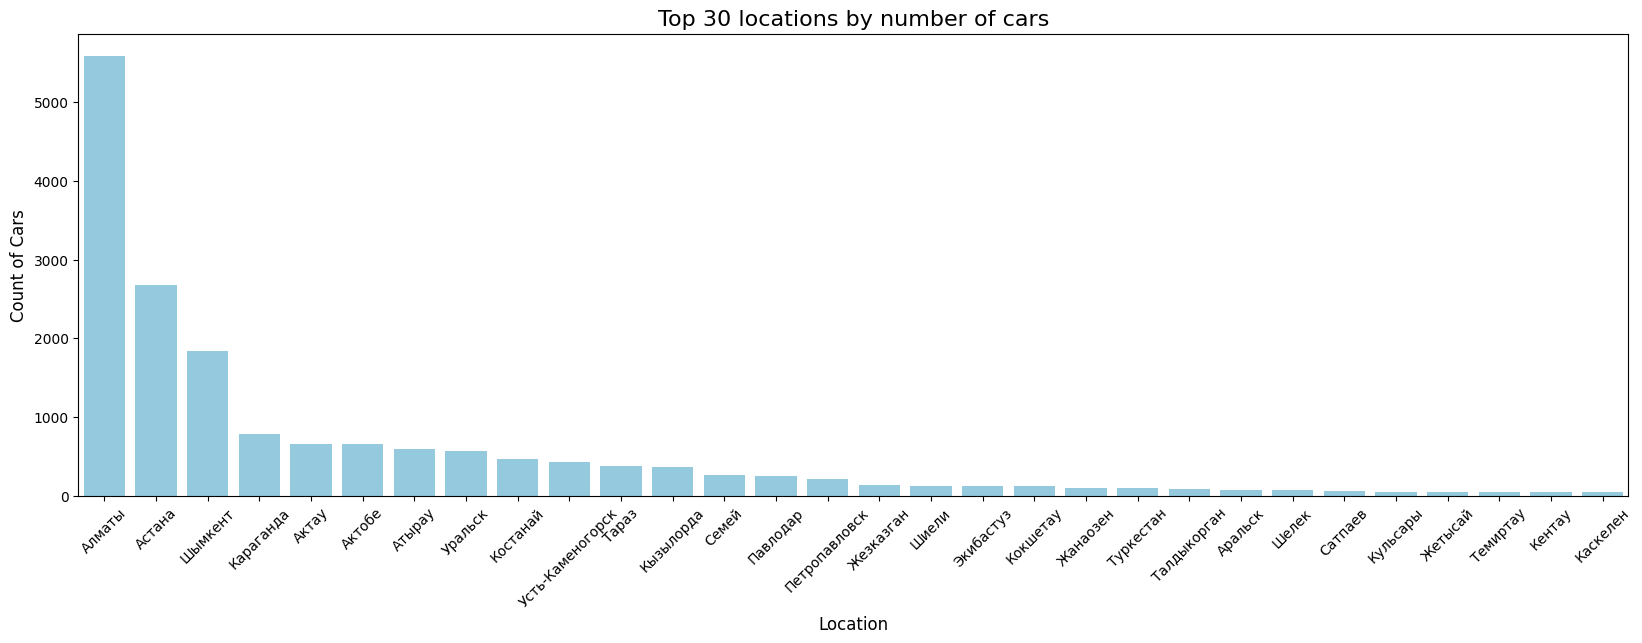

In [255]:
location_counts = df['Location'].value_counts().head(30)
plt.figure(figsize=(20, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, color='skyblue')
plt.title('Top 30 locations by number of cars', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count of Cars', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\Huawei\AppData\Local\Temp\ipykernel_7416\217010379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Title', data=top_expensive_cars, palette='viridis')


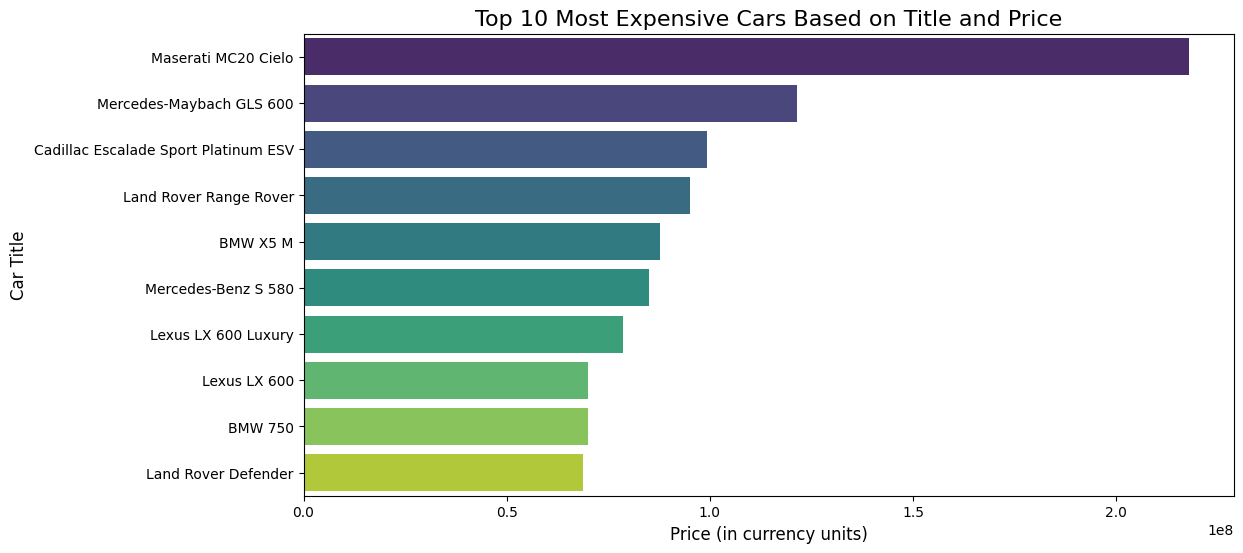

In [264]:
top_expensive_cars = df[['Title', 'Price']].drop_duplicates(subset='Title').sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Title', data=top_expensive_cars, palette='viridis')
plt.title('Top 10 Most Expensive Cars in the dataset', fontsize=16)
plt.xlabel('Price (in currency units)', fontsize=12)
plt.ylabel('Car Title', fontsize=12)
plt.show()




C:\Users\Huawei\AppData\Local\Temp\ipykernel_7416\2729618062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Поколение', y='Price', data=df, palette='Set2')


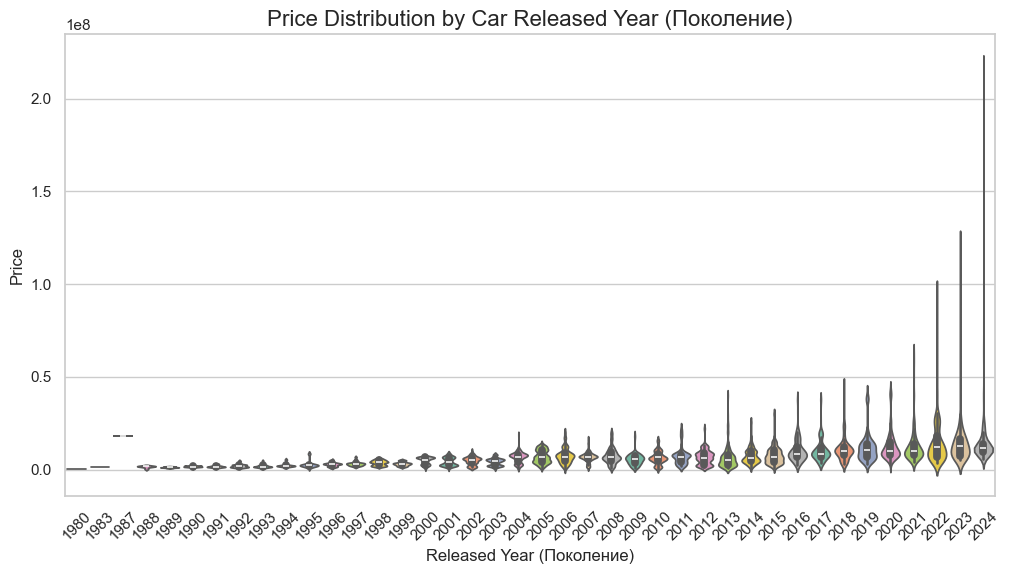

In [301]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Поколение', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Car Released Year (Поколение)', fontsize=16)
plt.xlabel('Released Year (Поколение)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()



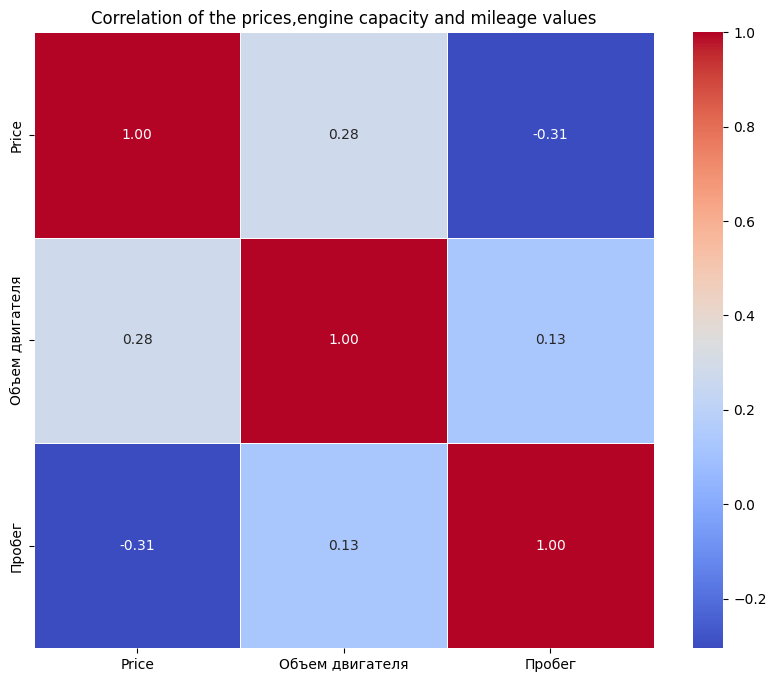

In [257]:
corr_matrix = df[['Price', 'Объем двигателя', 'Пробег']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of the prices,engine capacity and mileage values')
plt.show()


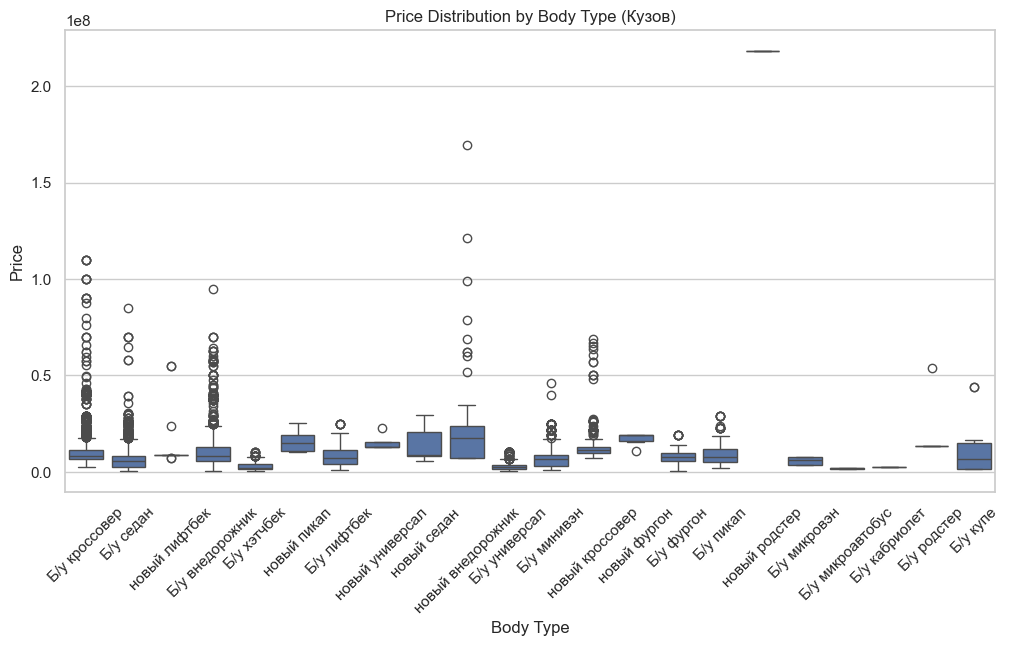

In [300]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Кузов', y='Price', data=df)
plt.title('Price Distribution by Body Type (Кузов)')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


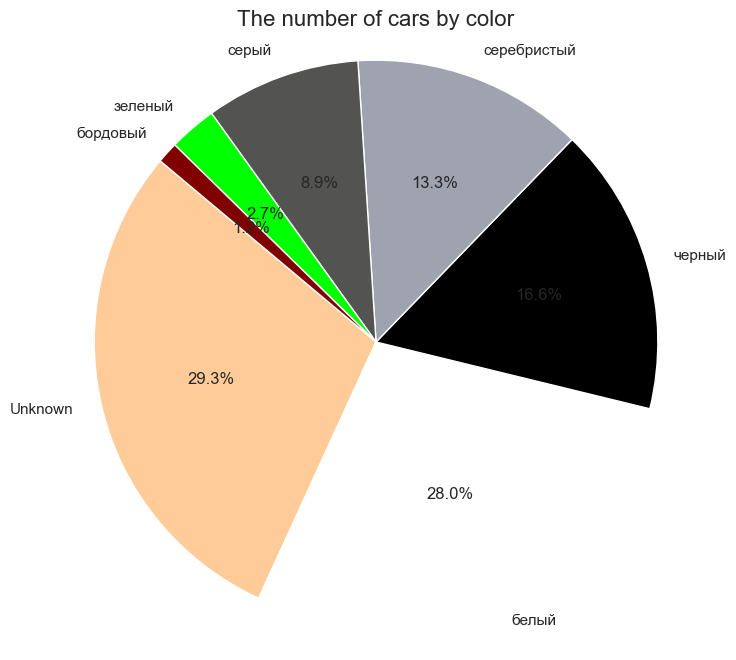

In [302]:
color_counts = df['Цвет'].value_counts()
colors = ['#ffcc99', '#ffffff', '#000', '#9fa2af', '#535352','#00ff00', '#800000', '#c2f0c0']
plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The number of cars by color', fontsize=16)
plt.axis('equal')  
plt.show()


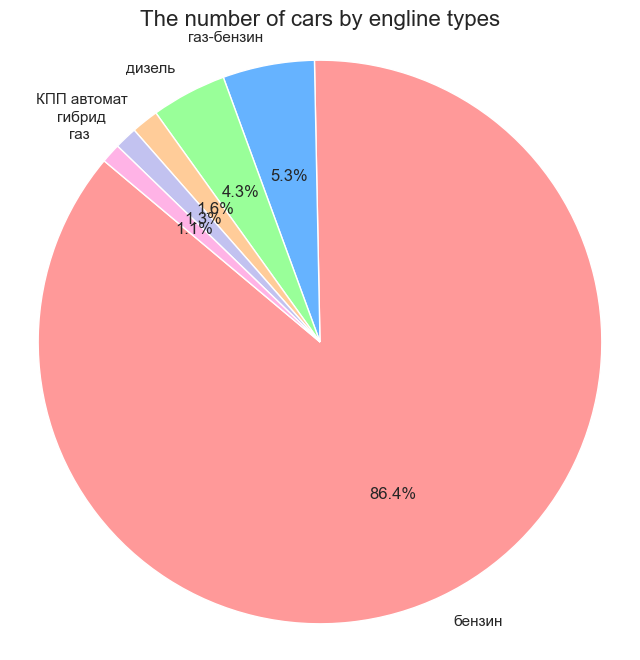

In [298]:
color_counts = df['Двигатель'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c0']
plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The number of cars by engline types', fontsize=16)
plt.axis('equal') 
plt.show()


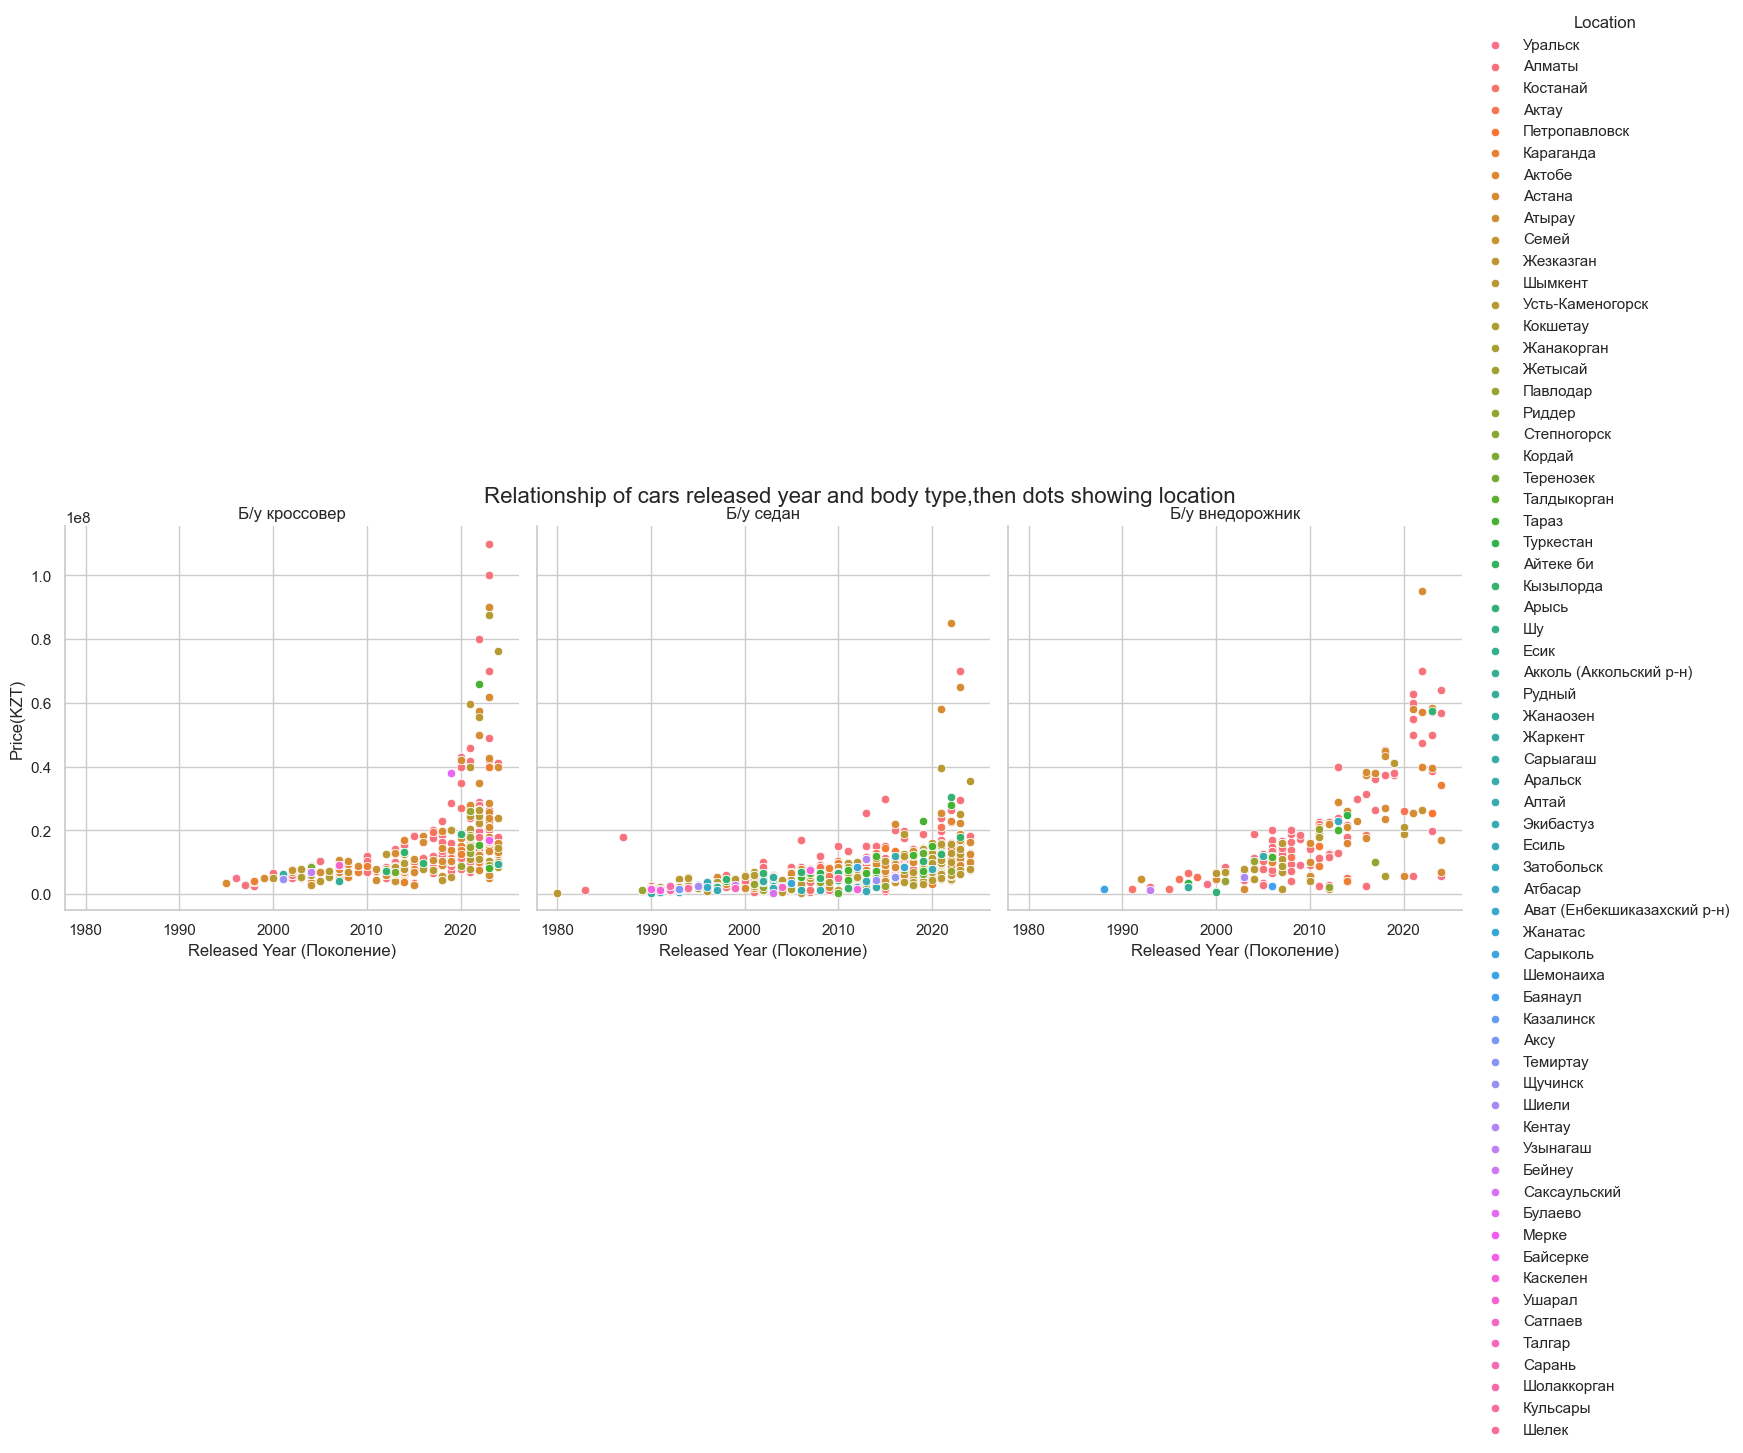

In [297]:
sns.set(style="whitegrid")
top_3_кар_тип = df['Кузов'].value_counts().head(3).index
df_top_3 = df[df['Кузов'].isin(top_3_кар_тип)]
g = sns.FacetGrid(df_top_3, col="Кузов", col_wrap=3, height=5, hue="Location") 
g.map(sns.scatterplot, 'Поколение', 'Price')
g.set_axis_labels("Released Year (Поколение)", "Price(KZT)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship of cars released year and body type,then dots showing location', fontsize=16)
g.add_legend(title='Location')
plt.show()


The end